In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# set the filepath and load in a shapefile
fp = "./maps-master/States/Admin2.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

DriverError: ./maps-master/States/Admin2.shp: No such file or directory

In [ ]:
nota= pd.read_csv("nota_temp.csv")
nota.head()

In [3]:
merged = map_df.merge(nota, how='left', on="ST_NM")
# merged['Value']=merged['Value'].mask(merged['Value'].isnull()==True,-1)
merged.head(1)

NameError: name 'map_df' is not defined

NameError: name 'merged' is not defined

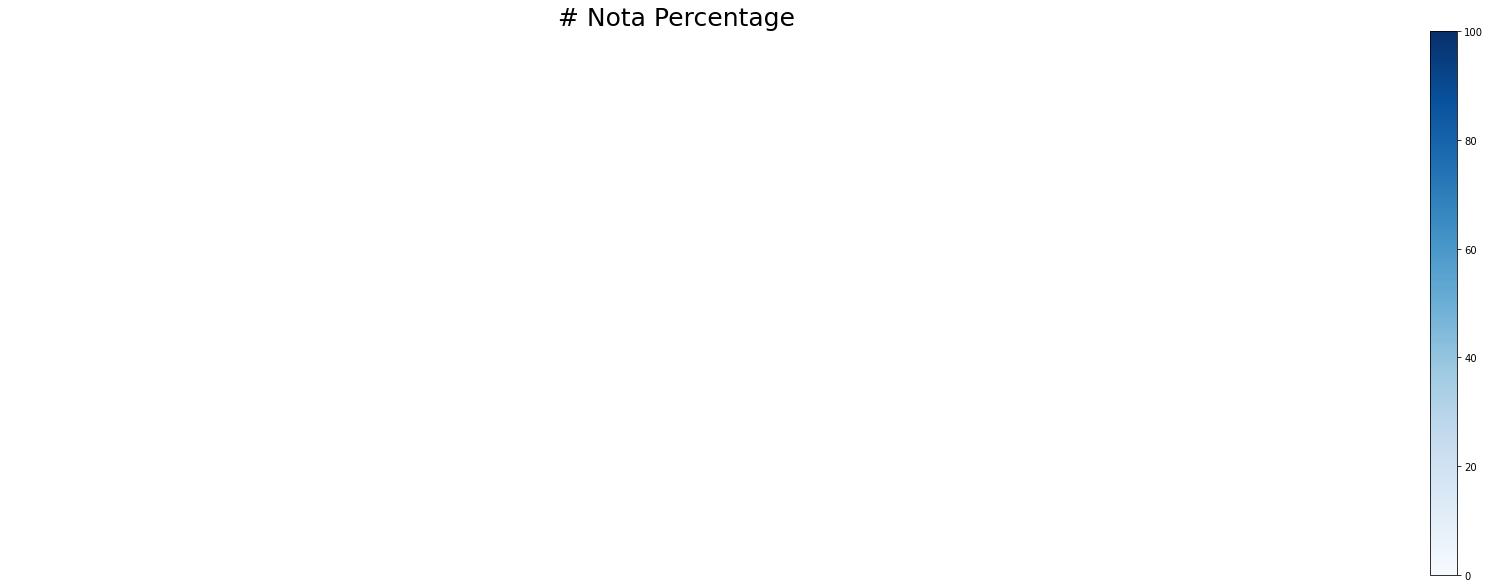

In [4]:
# set the value column that will be visualised
variable = 'Value'
# set the range for the choropleth values
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

ax.set_title('# Nota Percentage', fontsize=25, fontweight=3)

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
             
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

states=['Manipur','Punjab','Uttarakhand','Goa','Uttar Pradesh']

for idx, row in merged.iterrows():
    
    if row['ST_NM'] in states:
        plt.annotate(s=row['Value'], xy=row['coords'],horizontalalignment='center')

In [ ]:
df1=pd.read_csv('Consolidated_AE_mastersheet.csv')
states=['Goa','Manipur','Punjab','Uttar_Pradesh','Uttarakhand']
df1=df1[df1['State_Name'].isin(states)]

In [5]:
df=df1[df1['Party']=='NOTA']
df.groupby(['State_Name','Year'])['Assembly_No'].unique()

NameError: name 'df1' is not defined

In [6]:
df1.groupby(['State_Name'])['Assembly_No'].max()

NameError: name 'df1' is not defined

In [7]:
#find the last assembly for every state
df.groupby(['State_Name'])['Assembly_No'].unique()

NameError: name 'df' is not defined

In [8]:
target_assembly=pd.DataFrame({'State_Name':df.groupby(['State_Name'])['Assembly_No'].unique().index,'Assembly_No':df.groupby(['State_Name'])['Assembly_No'].unique().values})

NameError: name 'df' is not defined

In [9]:
target_assembly

NameError: name 'target_assembly' is not defined

In [10]:
df.groupby(['State_Name','Assembly_No','Year'])['Votes'].sum()

NameError: name 'df' is not defined

In [11]:
df2=df.groupby(['State_Name','Assembly_No','Year'])['Votes'].sum()

NameError: name 'df' is not defined

In [12]:
df2= df2.reset_index()
df2

NameError: name 'df2' is not defined

In [13]:
df3=df.groupby(['State_Name','Assembly_No','Year'])['Valid_Votes'].sum()
df3= df3.reset_index()
df3

NameError: name 'df' is not defined

In [14]:
merged_nota=df3.merge(df2,how='left',on=['State_Name','Assembly_No','Year'])

NameError: name 'df3' is not defined

In [15]:
merged_nota['Percentage']=np.nan
merged_nota['Percentage']=merged_nota['Votes']*100/merged_nota['Valid_Votes']

NameError: name 'merged_nota' is not defined

In [16]:
merged_nota

NameError: name 'merged_nota' is not defined

In [17]:
dp=df1[df1['Party']!='NOTA']
len(df1),len(dp)

NameError: name 'df1' is not defined

In [18]:
df4=dp.groupby(['State_Name','Assembly_No'])['Party'].unique().str.len()
df4=df4.reset_index()

NameError: name 'dp' is not defined

In [19]:
df5=dp.groupby(['State_Name','Assembly_No'])['Party_ID'].unique().str.len()
df5=df5.reset_index()

NameError: name 'dp' is not defined

In [20]:
merged_party=df4.merge(df5,how='left',on=['State_Name','Assembly_No'])

NameError: name 'df4' is not defined

In [21]:
merged_party['Diff']=np.nan
merged_party['Diff']=merged_party['Party']-merged_party['Party_ID']
merged_party[merged_party['Diff']>0]

NameError: name 'merged_party' is not defined

In [22]:
merged_party['Diff'].unique()

NameError: name 'merged_party' is not defined

In [23]:
d_year=df1.groupby(['State_Name','Assembly_No','Poll_No'])['Year'].unique()
d_year=d_year.reset_index()
len(d_year)

NameError: name 'df1' is not defined

In [24]:
d_year['Year_Count']=np.nan
d_year['Year_Count']=d_year['Year'].str.len()
d_year.explode('Year')

NameError: name 'd_year' is not defined

In [25]:
fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
})

# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio

pio.show(fig)

In [26]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)

fig.show()

In [27]:
fig=go.Figure(dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
}))

fig.show()

In [28]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")
fig.show()

In [29]:
import numpy as np
import plotly.figure_factory as ff

x1,y1 = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))
u1 = np.cos(x1)*y1
v1 = np.sin(x1)*y1

fig = ff.create_quiver(x1, y1, u1, v1)

fig.show()

In [30]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

In [31]:
#Adding traces later 

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.show()

In [32]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

In [33]:
d_year1=d_year.explode('Year')
d_year1.dropna(subset=['Year'], inplace=True)

NameError: name 'd_year' is not defined

In [34]:
d_year1['Count']=np.nan
d_year1['Count']=1

d_year1['Year']=d_year1['Year'].astype(float).astype(int).astype(str)

NameError: name 'd_year1' is not defined

In [35]:
d_year1=d_year1[d_year1['Poll_No']==0]
d_year1.sort_values(by=['Year','Assembly_No','State_Name'], inplace=True)
d_year1

NameError: name 'd_year1' is not defined

In [36]:
d_year1.to_csv('Assembly_Chart.csv')

NameError: name 'd_year1' is not defined

In [37]:
import plotly.express as px
fig = px.sunburst(d_year1, path=['State_Name','Assembly_No','Year'], values='Count',width=600, height=600)
fig.show()

NameError: name 'd_year1' is not defined

In [38]:
import plotly.express as px
data = pd.DataFrame({'State_Name':["State_Name"],'Assembly_Number':['Assembly Number'],'Year':['General Election Year']})

fig = px.sunburst(data, path=['State_Name','Assembly_Number','Year'])
fig.show()


In [39]:
display(d_year1.dtypes)

NameError: name 'd_year1' is not defined

In [40]:
d_year[d_year['State_Name']=='Punjab']

NameError: name 'd_year' is not defined

In [41]:
df1=pd.read_csv('Consolidated_AE_mastersheet.csv')
states=['Goa','Manipur','Punjab','Uttar_Pradesh','Uttarakhand']
df1=df1[df1['State_Name'].isin(states)]

FileNotFoundError: [Errno 2] No such file or directory: 'Consolidated_AE_mastersheet.csv'

In [42]:
voter=pd.read_csv('voterturnout.csv')

In [43]:
turnout=voter.groupby(by=['State_Name'])['Assembly_No'].max().reset_index()

turnout=turnout.merge(voter[['State_Name','Assembly_No','female','male','total','Year']], how='left', on=['State_Name','Assembly_No'])

turnout

State_Name  Assembly_No  female   male  total  Year
0            Goa            6   84.57  78.86  81.73  2012
1        Manipur           11   81.36  76.94  79.19  2012
2         Punjab           15   78.12  76.69  77.37  2017
3  Uttar_Pradesh           17   63.26  59.43  60.03  2017
4    Uttarakhand            4   69.34  62.28  65.64  2017

In [44]:
fig = px.bar(voter, x="Year", y="total", animation_frame="State_Name", animation_group="Year",color="State_Name", hover_name="Assembly_No", range_x=[1960,2020], range_y=[0,100])

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 5000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1500

fig.show()

In [45]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Line(
    x=voter[voter['State_Name']=='Goa']['Assembly_No'],
    y=voter[voter['State_Name']=='Goa']['total'],
    name='Goa',
    marker_color='purple'
))

fig.add_trace(go.Line(
    x=voter[voter['State_Name']=='Manipur']['Assembly_No'],
    y=voter[voter['State_Name']=='Manipur']['total'],
    name='Manipur',
    marker_color='green'
))

fig.add_trace(go.Line(
    x=voter[voter['State_Name']=='Punjab']['Assembly_No'],
    y=voter[voter['State_Name']=='Punjab']['total'],
    name='Punjab',
    marker_color='red'
))


fig.add_trace(go.Line(
    x=voter[voter['State_Name']=='Uttarakhand']['Assembly_No'],
    y=voter[voter['State_Name']=='Uttarakhand']['total'],
    name='Uttarakhand',
    marker_color='yellow'
))

fig.add_trace(go.Line(
    x=voter[voter['State_Name']=='Uttar_Pradesh']['Assembly_No'],
    y=voter[voter['State_Name']=='Uttar_Pradesh']['total'],
    name='Uttar Pradesh',
    marker_color='blue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')

fig.show()


/home/srishti/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [46]:
fig = go.Figure()
fig.add_trace(go.Line(
    x=turnout['State_Name'],
    y=turnout['total'],
    name='total',
    marker_color='purple'
))

fig.add_trace(go.Line(
    x=turnout['State_Name'],
    y=turnout['female'],
    name='female',
    marker_color='yellow'
))

fig.add_trace(go.Line(
    x=turnout['State_Name'],
    y=turnout['male'],
    name='male',
    marker_color='green'
))

fig.update_layout(barmode='group', template='seaborn')


# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig.show()

In [47]:
import json
with open('./India_States.geojson') as f:
    gj = json.load(f)
features = gj['features'][0]
features

{'type': 'Feature',
 'properties': {'ST_NM': 'Andaman & Nicobar Island', 'ST_Code': 0},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[93.71975948121514, 7.207067636262479],
     [93.71908835314503, 7.206733376244358],
     [93.7184177412858, 7.20690153867514],
     [93.71774713032585, 7.207069700206546],
     [93.71690873554974, 7.207154293136171],
     [93.715818883135, 7.207322880046945],
     [93.71498057379449, 7.207491207952955],
     [93.7140582443925, 7.207492145046501],
     [93.71347139359, 7.207576478072042],
     [93.7130525784138, 7.207995589125176],
     [93.71280137348464, 7.208330793431401],
     [93.71279292705202, 7.208354972603956],
     [93.71237678735889, 7.209546236169899],
     [93.7122167278198, 7.210592295198296],
     [93.71205013380671, 7.211681050440177],
     [93.71213491649326, 7.212602076724522],
     [93.71213593632444, 7.213606924320175],
     [93.71205302063044, 7.214528120576347],
     [93.71180232112027, 7.215365748230738],
     [93.71138

In [48]:
import plotly.graph_objects as go

In [49]:
df = pd.read_csv("./nota.csv",dtype={"State": str})
df_1= pd.read_csv("./nota_temp_t.csv",dtype={"State": str})

df_2= pd.read_csv("./nota_temp.csv",dtype={"State": str})

In [50]:
df_null= pd.read_csv("./states_shapefile_name.csv",dtype={"State": str})

In [51]:
df = pd.read_csv("./data/newcomer.csv",dtype={"State_Name": str})
df

Unnamed: 0     State_Name  Assembly_No  \
0           0            Goa            7   
1           1        Manipur           12   
2           2         Punjab           15   
3           3  Uttar Pradesh           17   
4           4    Uttarakhand            4   

                                     Constituency_No  count  
0                          [ 6  7 10 13 27 28 34 38]      8  
1              [ 4  6  8 10 15 19 23 33 35 40 41 43]     12  
2  [  2   3   4   8  14  16  18  22  24  25  26  ...     58  
3  [  1   4   5   6   7   8   9  10  12  13  15  ...    238  
4  [ 5  6  7  8  9 10 18 29 33 36 37 39 41 42 45 ...     20

In [52]:
fig_1 = go.Figure()
fig_1.add_trace(go.Bar(
    x=df[df['Constituency_Type']=='GEN']['State_Name'],
    y=df[df['Constituency_Type']=='GEN']['count_i'],
    name='GEN',
    marker_color='purple'
))
fig_1.add_trace(go.Bar(
    x=df[df['Constituency_Type']=='SC']['State_Name'],
    y=df[df['Constituency_Type']=='SC']['count_i'],
    name='SC',
    marker_color='red'
))
fig_1.add_trace(go.Bar(
    x=df[df['Constituency_Type']=='ST']['State_Name'],
    y=df[df['Constituency_Type']=='ST']['count_i'],
    name='ST',
    marker_color='yellow'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig_1.update_layout(barmode='group')

fig_1.show()

KeyError: 'Constituency_Type'

In [ ]:
# Dashboard Model

def map(df,x,df_1):
    fig = px.choropleth(df_1, geojson=gj, locations='ST_NM', color='Value',
                               featureidkey="properties.ST_NM",
                               color_discrete_sequence=["rgb(211,211,211)"]
                              )
    fig.add_trace(go.Choropleth(featureidkey='properties.ST_NM',
                                  geojson=gj,
                                  locations=df['State_Name'],
                                  z=df["{}".format(x)],
                                  #colorscale=[[0, 'rgb(224,176,255)'], [1, 'rgb(128,0,128)']],
                                  colorscale='viridis',
                                  showscale=False                      
                                 ))
    
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(paper_bgcolor="LightSteelBlue",width=2000, height=2500,margin=dict(l=0, r=0, t=0, b=0),showlegend=False, xaxis=dict(mirror=True,showline=True), yaxis=dict(mirror=True,showline=True))
    config = dict({'scrollZoom': False})

    return(fig.show(config=config))

map(df,'count',df_null)

In [77]:
contest=pd.read_csv('./data/contestant.csv')
contest['women_contestant_per']=np.nan
contest['women_contestant_per']=round(contest['Women']*100/contest['Total'],2)
contest['women_winner_per']=np.nan
contest['women_winner_per']=round(contest['Winner']*100/contest['total'],2)
contest.rename({'Total':'total_contestant','Women':'women_contestant','Winner':'women_winner','total':'total_winner'}, axis=1, inplace=True)

Unnamed: 0     State_Name  Assembly_No  total_contestant  women_contestant  \
0           0            Goa            7               251                19   
1           1        Manipur           12               266                11   
2           2         Punjab           15              1145                81   
3           3  Uttar Pradesh           17              4853               482   
4           4    Uttarakhand            4               637                62   

   women_winner  total_winner  women_contestant_per  women_winner_per  
0             2            40                  7.57              5.00  
1             2            60                  4.14              3.33  
2             6           117                  7.07              5.13  
3            42           403                  9.93             10.42  
4             5            70                  9.73              7.14

In [55]:
c_1=contest.groupby(['State_Name','Assembly_No','total_contestant','women_contestant'])['women_contestant_per'].unique().reset_index().explode('women_contestant_per')
c_1['type']='women_contestant_per'
c_1.rename({'women_contestant_per':'per'}, axis=1, inplace=True)

c_2=contest.groupby(['State_Name','Assembly_No','women_winner','total_winner'])['women_winner_per'].unique().reset_index().explode('women_winner_per')
c_2['type']='women_winner_per'
c_2.rename({'women_winner_per':'per'}, axis=1, inplace=True)

c=c_2.append(c_1)

c['winner']=np.nan
c['winner']=c['winner'].mask( (c['women_winner'].isna()==True), c['women_contestant'])
c['winner']=c['winner'].mask( (c['women_winner'].isna()==False), c['women_winner'])
c['contestant']=np.nan
c['contestant']=c['contestant'].mask( (c['total_contestant'].isna()==True), c['total_winner'])
c['contestant']=c['contestant'].mask( (c['total_contestant'].isna()==False), c['total_contestant'])

State_Name  Assembly_No  women_winner  total_winner    per  \
0            Goa            7           2.0          40.0    5.0   
1        Manipur           12           2.0          60.0   3.33   
2         Punjab           15           6.0         117.0   5.13   
3  Uttar Pradesh           17          42.0         403.0  10.42   
4    Uttarakhand            4           5.0          70.0   7.14   
0            Goa            7           NaN           NaN   7.57   
1        Manipur           12           NaN           NaN   4.14   
2         Punjab           15           NaN           NaN   7.07   
3  Uttar Pradesh           17           NaN           NaN   9.93   
4    Uttarakhand            4           NaN           NaN   9.73   

                   type  total_contestant  women_contestant  winner  \
0      women_winner_per               NaN               NaN     2.0   
1      women_winner_per               NaN               NaN     2.0   
2      women_winner_per               NaN               NaN     6.0   
3      women_winner_per               NaN               NaN    42.0   
4      women_winner_per               NaN               NaN     5.0   
0  women_contestant_per             251.0              19.0    19.0   
1  women_contestant_per             266.0              11.0    11.0   
2  women_contestant_per            1145.0              81.0    81.0   
3  women_contestant_per            4853.0             482.0   482.0   
4  women_contestant_per             637.0              62.0    62.0   

   contestant  
0        40.0  
1        60.0  
2       117.0  
3       403.0  
4        70.0  
0       251.0  
1       266.0  
2      1145.0  
3      4853.0  
4       637.0

In [75]:
fig = px.bar(c, x="State_Name", y="per",
             color='type', barmode='group',
             height=400, hover_name="type", hover_data={"winner":True, "contestant":True, "type":False,"State_Name":False}, 
             labels = {"winner":"women","contestant":"total", "type":"", "per":"Percentage"}, 
             color_discrete_map={
             'women_winner_per': 'lightblue',
              'women_contestant_per': 'purple'
    })

fig.update_layout(hovermode=None, plot_bgcolor="White")
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey')

fig.show()

In [57]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=contest['State_Name'].tolist(),
    y=contest['women_contestant_per'].tolist(),
    name='Women Contestant Percentage',
    marker_color='purple',
    
    hovertemplate =
    'Total Contestant: %{y:.2f}'+
    '<br>Women Contestant:%{text}'+
    '<extra></extra>',
    
    text = ['{}'.format(i) for i in contest['women_contestant']]
))

fig.add_trace(go.Bar(
   x=contest['State_Name'],
    y=contest['women_winner_per'],
    name='Women Winner Percentage',
    marker_color='grey'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')

fig.show()

In [58]:
for i in contest["women_contestant"]:
    print(i)

19
11
81
482
62


Unnamed: 0     State_Name  Assembly_No Constituency_Type  \
0            0            Goa            7               GEN   
1            1            Goa            7                SC   
2            2        Manipur           12               GEN   
3            3        Manipur           12                SC   
4            4        Manipur           12                ST   
5            5         Punjab           15               GEN   
6            6         Punjab           15                SC   
7            7  Uttar Pradesh           17               GEN   
8            8  Uttar Pradesh           17                SC   
9            9    Uttarakhand            4               GEN   
10          10    Uttarakhand            4                SC   
11          11    Uttarakhand            4                ST   

                                      Constituency_No  count_i  total  \
0   [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 ...       39     40   
1                                                 [2]        1     40   
2   [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ...       40     60   
3                                                [16]        1     60   
4   [41 42 43 44 45 46 47 48 49 51 52 53 54 55 56 ...       19     60   
5   [  1   3   4   6   7   9  10  11  12  13  15  ...       83    117   
6   [  2   5   8  14  16  20  25  29  30  33  34  ...       34    117   
7   [  1   2   3   4   5   7   8   9  10  11  12  ...      318    403   
8   [  6  13  18  21  31  38  39  45  59  70  71  ...       85    403   
9   [ 2  3  4  6  7  8 10 11 12 13 14 16 17 18 19 ...       55     70   
10           [ 1  5  9 20 27 28 29 37 45 47 51 58 64]       13     70   
11                                            [15 69]        2     70   

    Percentage  
0        97.50  
1         2.50  
2        66.67  
3         1.67  
4        31.67  
5        70.94  
6        29.06  
7        78.91  
8        21.09  
9        78.57  
10       18.57  
11        2.86

In [89]:


constituencies=pd.read_csv('./data/constituencies.csv')
constituencies['Percentage']=np.nan
constituencies['Percentage']=round(constituencies['count_i']*100/ constituencies['total'], 2)

fig = px.bar(constituencies, x="State_Name", y="Percentage",
             color='Constituency_Type', barmode='group',
             height=400, hover_name="Constituency_Type", hover_data={"count_i":True, "total":True, "Constituency_Type":False,"State_Name":False}, 
             labels = {"count_i":"Count","total":"Total", "type":"", "per":"Percentage"}, 
             color_discrete_map={
             'GEN': 'lightgreen',
              'SC': 'yellow',
                 'ST':'green'}
            )

fig.update_layout(hovermode=None, plot_bgcolor="White")
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey')

fig.show()